In [1]:
# Import scikit-plot
import scikitplot.seaborn as sp

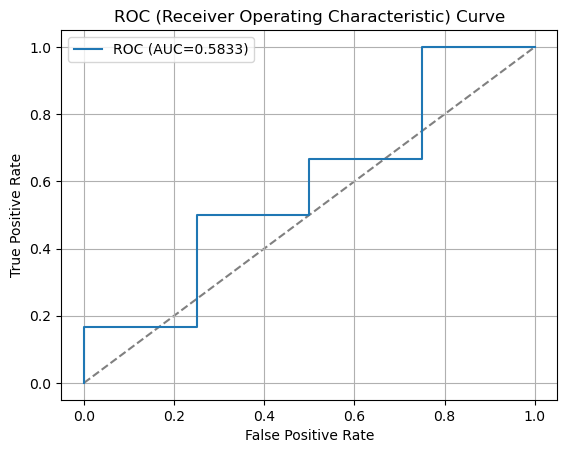

In [2]:
ax = sp.aucplot(
    x=[0, 1, 1, 0, 1, 0, 1, 1, 0, 1],
    y=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8  , 0.9, 1.0],
)

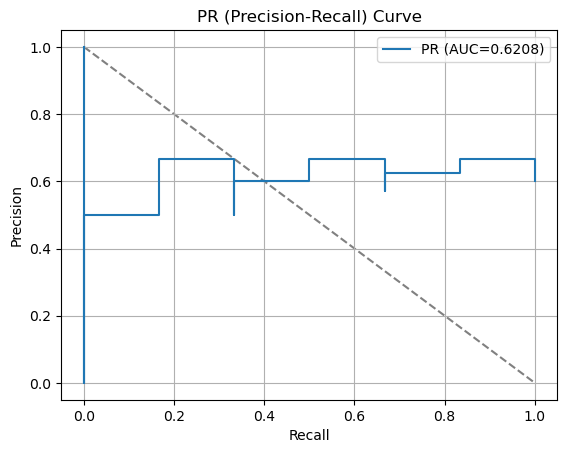

In [3]:
ax = sp.aucplot(
    x=[0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
    y=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    kind="pr",
)

In [4]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)  # reproducibility
import pandas as pd

from sklearn.datasets import (
    load_breast_cancer as data_2_classes,
    load_iris as data_3_classes,
    load_digits as data_10_classes,
)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
# Load the data
X, y = data_10_classes(return_X_y=True, as_frame=False)
# X, y = data_3_classes(return_X_y=True, as_frame=False)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
model = (
    LogisticRegression(max_iter=int(1), random_state=0)
    .fit(X_train, y_train)
)
# Perform predictions
y_val_prob = model.predict_proba(X_val)
# Create a DataFrame with predictions
df = pd.DataFrame({
    "y_true": y_val==1,  # target class (0,1,2)
    "y_score": y_val_prob[:, 1],  # target class (0,1,2)
    # "y_true": np.random.normal(0.5, 0.1, 100).round(),
    # "y_score": np.random.normal(0.5, 0.15, 100),
    # "hue": np.random.normal(0.5, 0.4, 100).round(),
})

/root/micromamba/envs/py311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


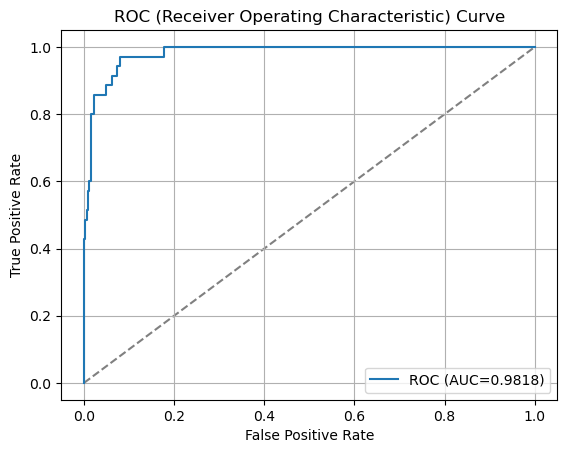

In [7]:
ax = sp.aucplot(x=df.y_true, y=df.y_score)


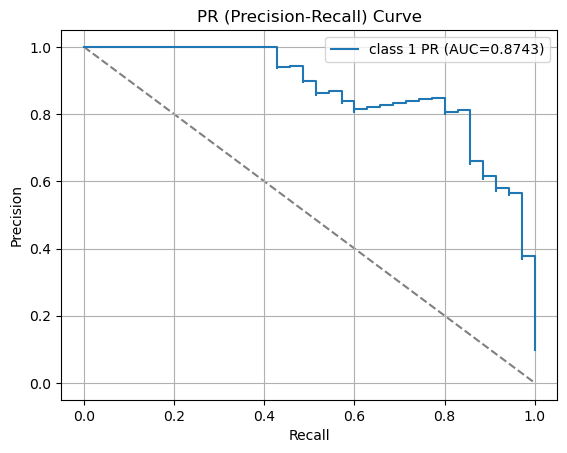

In [8]:
ax = sp.aucplot(
    df,
    x="y_true",
    y="y_score",
    kind="pr",
    label=f"class 1",
)

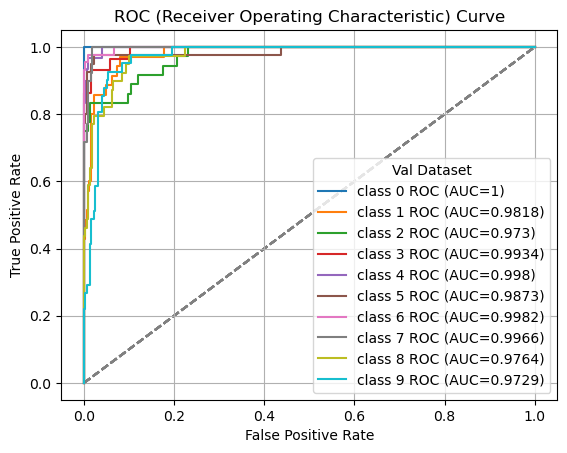

In [9]:
for i in range(10):
    ax = sp.aucplot(
        x=y_val==i,
        y=y_val_prob[:, i],
        label=f"class {i}",
    )

    # --- Collect unique handles and labels ---
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # deduplicate

    # Override legend
    ax.legend(by_label.values(), by_label.keys(), title="Val Dataset")

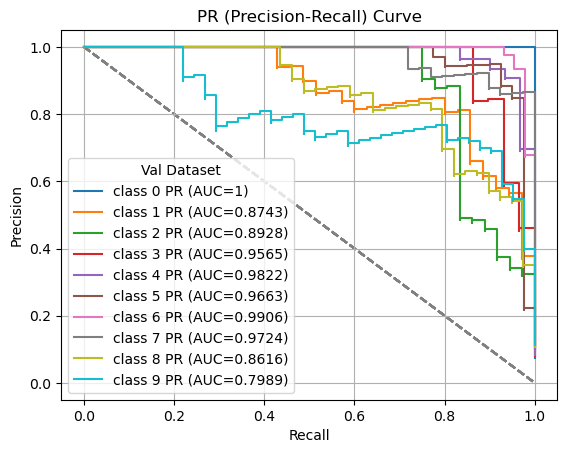

In [10]:
for i in range(10):
    ax = sp.aucplot(
        x=y_val==i,
        y=y_val_prob[:, i],
        kind="pr",
        label=f"class {i}",
    )

    # # With raw arrays (no DataFrame)
    # # Works because seaborn normalizes arrays internally
    # np.random.seed(i)  # reproducibility
    # ax = sp.aucplot(
    #     x=np.random.normal(0.5, 0.1, 100).round(),
    #     y=np.random.normal(0.5, 0.1, 100),
    #     kind="pr",
    #     label=f"{i}",
    # )

    # --- Collect unique handles and labels ---
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # deduplicate

    # Override legend
    ax.legend(by_label.values(), by_label.keys(), title="Val Dataset")